In [28]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**DataFrame**

In [3]:
df=pd.read_csv("/content/Cars - Purchase Decision.csv")
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


The given dataset is supervised/dependent-category/classification

In [4]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [5]:
df.drop(["User ID"],axis=1,inplace=True)

In [6]:
df

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,AnnualSalary,Purchased
Age,1.000000,0.166042,0.616036
AnnualSalary,0.166042,1.000000,0.364974
Purchased,0.616036,0.364974,1.000000


In [8]:
def central_limit_theorem(continous_column,sample_size,rage):
  result_centrallimit={}
  pop=df[continous_column].values
  population_mean=pop.mean()
  allsample=[]
  for i in range(rage):
     sample=np.random.choice(pop,sample_size)
     allsample.append(sample.mean())
  all_sample_mean=(np.mean(allsample))
  result_centrallimit.update({'Column Name':continous_column,
                       'Population mean':population_mean,
                       'Allsample mean':all_sample_mean
                       })
  if continous_column:
    H0_accepted=0
    H0_rejected=0
    for i in range(rage):
      sample1=df[continous_column].sample(frac=0.04)
      t_test,p_value=stats.ttest_1samp(sample1,df[continous_column].mean())
      if p_value<0.05:
        H0_rejected+=1
      else:
        H0_accepted+=1
      if H0_accepted>H0_rejected:
        result_centrallimit.update({'Onesamplettest':' Dependent-Data is Distributed Properly'})
      else:
        result_centrallimit.update({'Onesamplettest':' Independent-Data is not Distributed Properly'})
    return(result_centrallimit)


In [9]:
columns=["Age","AnnualSalary"]
res=[]
for i in columns:
  s=central_limit_theorem(i,50,10)
  res.append(s)
pd.DataFrame(res)

,Column Name,Population mean,Allsample mean,Onesamplettest
0,Age,40.106,39.744,Dependent-Data is Distributed Properly
1,AnnualSalary,72689.000,71329.000,Dependent-Data is Distributed Properly


In [10]:
def twosamplettest(continous_column1,continous_column2,sample_size,rage):
   H0_accepted=0
   H0_rejected=0
   result={}
   allsample1=[]
   allsample2=[]
   for i in range(rage):
     sample1=df[continous_column1].sample(frac=0.04)
     sample2=df[continous_column2].sample(frac=0.04)
     t_test,p_value=stats.ttest_ind(sample1,sample2)
     if p_value<0.05:
        H0_rejected+=1
     else:
        H0_accepted+=1
     if H0_accepted>H0_rejected:
         result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest':' Dependent-Data is Distributed Properly'})
     else:
         result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest':' Independent-Data is not Distributed Properly'})
   if continous_column1:
     H0_accepted=0
     H0_rejected=0
     for i in range(rage):
         column1=df[continous_column1]
         column2=df[continous_column2]
         sample1=np.random.choice(column1,sample_size)
         sample2=np.random.choice(column2,sample_size)
         allsample1.append(sample1.mean())
         allsample2.append(sample2.mean())
         t_test,p_value=stats.ttest_ind(allsample1,allsample2)
         if p_value<0.05:
              H0_rejected+=1
         else:
            H0_accepted+=1
         if H0_accepted>H0_rejected:
              result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':' Dependent-Data is Distributed Properly'})
         else:
              result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':' Independent-Data is not Distributed Properly'})

   return result


In [11]:
columns=["Age","AnnualSalary"]
res1=[]
for i in range (len(columns)-1):
  column1=columns[i]
  for j in range(i+1,len(columns)):
      column2=columns[j]
      j=twosamplettest(column1,column2,50,10)
      res1.append(j)
pd.DataFrame(res1)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


,column,twosamplettest,twosamplettest central
0,Age&AnnualSalary,Independent-Data is not Distributed Properly,Independent-Data is not Distributed Properly


In [12]:
def chi_square_test(category_column1,category_column2):
  result={}
  H0_accepted=0
  H0_rejected=0
  data1=pd.crosstab(df[category_column1],df[category_column2])
  observed_values=data1.values
  value=stats.chi2_contingency(observed_values)
  p_value=value[1]
  if p_value<0.05:
     H0_rejected+=1
  else:
    H0_accepted+=1
  if H0_accepted>H0_rejected:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is no relationship between two mentioned column"})
  else:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is relationship between two mentioned column"})

  return result

In [13]:
Category=["Gender","Purchased"]
res2=[]
for i in range(len(Category)-1):
  category1=Category[i]
  for j in range(i+1,len(Category)):
      category2=Category[j]
      chi=chi_square_test(category1,category2)
      res2.append(chi)
pd.DataFrame(res2)

,column,chi_square_test
0,Gender&Purchased,There is no relationship between two mentioned...


In [16]:
def annova_test(continous_column,category_column):
   result={}
   H0_accepted=0
   H0_rejected=0
   group=df[category_column].unique()
   grp={}
   for i in group:
     grp[i]=df[continous_column][df[category_column]==i]
   f_value,p_value=stats.f_oneway(*grp.values())
   if p_value<0.05:
    H0_rejected+=1
   else:
     H0_accepted+=1
   if H0_accepted>H0_rejected:
     result.update({
        'column':continous_column+"&"+category_column,
        "chi_square_test": "There is  relationship between two mentioned column"})
   else:
     result.update({
        'column':continous_column+"&"+category_column,
        "chi_square_test": "There is no relationship between two mentioned column"})

   return result



In [17]:
Category=["Gender","Purchased"]
continous=["Age","AnnualSalary"]
res3=[]
for i in continous:
  for j in Category:
    ann=annova_test(i,j)
    res3.append(ann)
pd.DataFrame(res3)

,column,chi_square_test
0,Age&Gender,There is no relationship between two mentioned...
1,Age&Purchased,There is no relationship between two mentioned...
2,AnnualSalary&Gender,There is no relationship between two mentioned...
3,AnnualSalary&Purchased,There is no relationship between two mentioned...


**DataVisualisation**

<ipython-input-18-47f5e7c89c25>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


<Axes: >

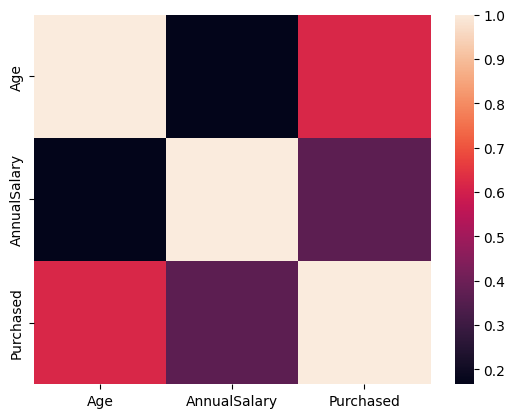

In [18]:
cor=df.corr()
sns.heatmap(cor)

In [20]:
fig=px.box(df,y="Age",x="Gender")
fig.show()

In [21]:
fig=px.box(df,y="AnnualSalary",x="Gender")
fig.show()

In [22]:
fig=px.sunburst(df,path=["Gender","Purchased"],values="Age")
fig.show()

In [23]:
fig=px.sunburst(df,path=["Gender","Purchased"],values="AnnualSalary")
fig.show()

**Data preprocessing**

In [24]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
df["Gender"]=df["Gender"].map({"Female":0,"Male":1})
df

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


**Logistic regression**

In [35]:
df["Purchased"].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

In [29]:
y=df["Purchased"]
x1=df["Gender"]
x=sm.add_constant(x1)
result_log=sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.672699
         Iterations 4


In [30]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                0.001655
Time:                        15:17:25   Log-Likelihood:                -672.70
converged:                       True   LL-Null:                       -673.81
Covariance Type:            nonrobust   LLR p-value:                    0.1353
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3047      0.089     -3.421      0.001      -0.479      -0.130
Gender        -0.1930      0.129     -1.492      0.136      -0.446       0.060
==============================================================================
"""

In [31]:
result_log.pred_table()

array([[598.,   0.],
       [402.,   0.]])

In [32]:
cm_df=pd.DataFrame(result_log.pred_table())
cm_df.columns=["predicted 0","predicted 1"]
cm_df=cm_df.rename(index={0:"actual 0",1:"actual 1"})
cm_df

,predicted 0,predicted 1
actual 0,598.0,0.0
actual 1,402.0,0.0


In [33]:
cm=np.array(cm_df)
acc=(cm[0,0]+cm[1,1])/cm.sum()
acc*100

59.8

In [36]:
y=df["Purchased"]
x1=df["Age"]
x=sm.add_constant(x1)
result_log=sm.Logit(y,x).fit()
cm_df=pd.DataFrame(result_log.pred_table())
cm=np.array(cm_df)
acc=(cm[0,0]+cm[1,1])/cm.sum()
print(acc*100)
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.443184
         Iterations 7
81.10000000000001


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.3423
Time:                        15:25:01   Log-Likelihood:                -443.18
converged:                       True   LL-Null:                       -673.81
Covariance Type:            nonrobust   LLR p-value:                2.557e-102
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9665      0.500    -15.923      0.000      -8.947      -6.986
Age            0.1827      0.012     15.579      0.000       0.160       0.206
==============================================================================
"""

In [37]:
y=df["Purchased"]
x1=df["AnnualSalary"]
x=sm.add_constant(x1)
result_log=sm.Logit(y,x).fit()
cm_df=pd.DataFrame(result_log.pred_table())
cm=np.array(cm_df)
acc=(cm[0,0]+cm[1,1])/cm.sum()
print(acc*100)
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.604682
         Iterations 5
77.10000000000001


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.1026
Time:                        15:26:21   Log-Likelihood:                -604.68
converged:                       True   LL-Null:                       -673.81
Covariance Type:            nonrobust   LLR p-value:                 6.380e-32
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.1563      0.178    -12.090      0.000      -2.506      -1.807
AnnualSalary   2.36e-05   2.18e-06     10.842      0.000    1.93e-05    2.79e-05
================================================================================
"""

In [38]:
y=df["Purchased"]
x1=df[["Gender","Age"]]
x=sm.add_constant(x1)
result_log=sm.Logit(y,x).fit()
cm_df=pd.DataFrame(result_log.pred_table())
cm=np.array(cm_df)
acc=(cm[0,0]+cm[1,1])/cm.sum()
print(acc*100)
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.442974
         Iterations 7
81.10000000000001


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.3426
Time:                        15:27:10   Log-Likelihood:                -442.97
converged:                       True   LL-Null:                       -673.81
Covariance Type:            nonrobust   LLR p-value:                5.592e-101
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0540      0.521    -15.468      0.000      -9.075      -7.033
Gender         0.1086      0.168      0.647      0.517      -0.220       0.438
Age            0.1835      0.012     15.522      0.000       0.160       0.207
==============================================================================
"""

In [39]:
y=df["Purchased"]
x1=df[["Gender","AnnualSalary"]]
x=sm.add_constant(x1)
result_log=sm.Logit(y,x).fit()
cm_df=pd.DataFrame(result_log.pred_table())
cm=np.array(cm_df)
acc=(cm[0,0]+cm[1,1])/cm.sum()
print(acc*100)
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.604378
         Iterations 5
77.2


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.1031
Time:                        15:27:55   Log-Likelihood:                -604.38
converged:                       True   LL-Null:                       -673.81
Covariance Type:            nonrobust   LLR p-value:                 6.983e-31
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.0968      0.193    -10.853      0.000      -2.475      -1.718
Gender          -0.1084      0.139     -0.780      0.435      -0.381       0.164
AnnualSalary  2.351e-05   2.18e-06     10.786      0.000    1.92e-05    2.78e-05
================================================================================
"""

In [40]:
y=df["Purchased"]
x1=df[["Age","AnnualSalary"]]
x=sm.add_constant(x1)
result_log=sm.Logit(y,x).fit()
cm_df=pd.DataFrame(result_log.pred_table())
cm=np.array(cm_df)
acc=(cm[0,0]+cm[1,1])/cm.sum()
print(acc*100)
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.372966
         Iterations 7
82.8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.4465
Time:                        15:28:40   Log-Likelihood:                -372.97
converged:                       True   LL-Null:                       -673.81
Covariance Type:            nonrobust   LLR p-value:                2.205e-131
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -11.8442      0.769    -15.399      0.000     -13.352     -10.337
Age              0.2161      0.015     14.520      0.000       0.187       0.245
AnnualSalary  3.325e-05   3.21e-06     10.344      0.000     2.7e-05    3.96e-05
================================================================================
"""

In [41]:
y=df["Purchased"]
x1=df[["Gender","Age","AnnualSalary"]]
x=sm.add_constant(x1)
result_log=sm.Logit(y,x).fit()
cm_df=pd.DataFrame(result_log.pred_table())
cm=np.array(cm_df)
acc=(cm[0,0]+cm[1,1])/cm.sum()
print(acc*100)
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.371479
         Iterations 7
83.6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Mon, 25 Mar 2024   Pseudo R-squ.:                  0.4487
Time:                        15:29:16   Log-Likelihood:                -371.48
converged:                       True   LL-Null:                       -673.81
Covariance Type:            nonrobust   LLR p-value:                9.794e-131
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.1788      0.805    -15.131      0.000     -13.756     -10.601
Gender           0.3184      0.186      1.716      0.086      -0.045       0.682
Age              0.2195      0.015     14.471      0.000       0.190       0.249
AnnualSalary   3.37e-05   3.23e-06     10.426      0.000    2.74e-05       4e-05
================================================================================
"""

In [43]:
#Now let predict the value Eg
yhat=result_log.params[0]+result_log.params[1]*1+result_log.params[2]*34+result_log.params[3]*20000
yhat

-3.7234618040007446

In [44]:
fig=px.scatter(df, x="Age",y="Purchased", color="Gender")
fig.show()

In [45]:
fig=px.scatter(df, x="AnnualSalary",y="Purchased", color="Gender")
fig.show()